In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

/Library/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

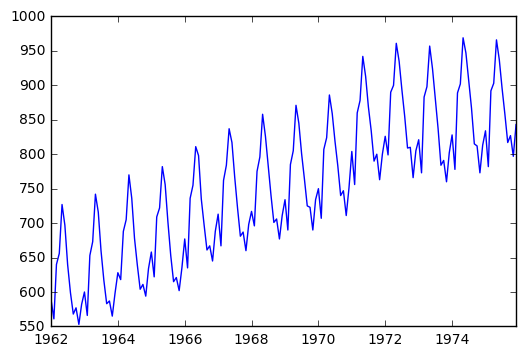

In [3]:
plt.plot(milk)

In [4]:
import statsmodels.api as sm

In [5]:
sm.tsa.stattools.adfuller(milk['milk'])

(-1.3038115874221237,
 0.62742670860303429,
 13,
 154,
 {'1%': -3.4735425281962091,
  '10%': -2.5768780536346769,
  '5%': -2.880497674144038},
 1115.1730447395112)

In [15]:
tmp = []
for row in milk.iterrows():
    tmp.append(float(row[1][0])/(row[0].days_in_month))
milk['perday'] = tmp
milk['daily'] = tmp

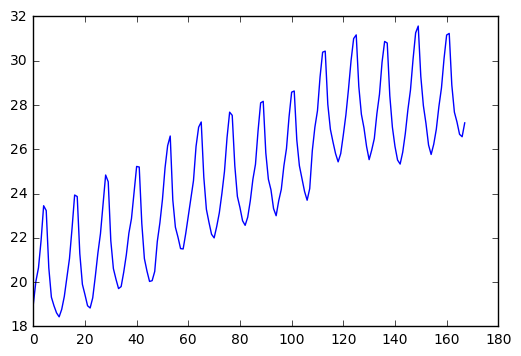

In [16]:
plt.plot(tmp)

In [23]:
milk['daily_diff1'] = milk.daily - milk.daily.shift(1)

In [26]:
sm.tsa.stattools.adfuller(milk['daily_diff1'][1:])

(-2.759469476228912,
 0.064300546541746717,
 11,
 155,
 {'1%': -3.4732590518613002,
  '10%': -2.5768120811654525,
  '5%': -2.8803740821053339},
 -1.1539973381055688)

In [30]:
milk['daily_diff12'] = milk.daily_diff1 - milk.daily_diff1.shift(12)

In [33]:
sm.tsa.stattools.adfuller(milk['daily_diff12'][13:])

(-5.4813263347969334,
 2.2808455518036496e-06,
 11,
 143,
 {'1%': -3.4769274060112707,
  '10%': -2.5776654080884152,
  '5%': -2.8819726324025625},
 -20.90513750989237)

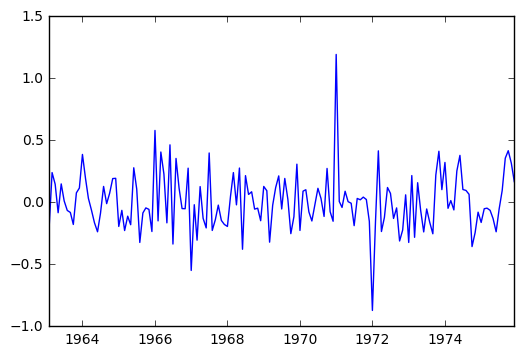

In [36]:
plt.plot(milk.daily_diff12[13:])

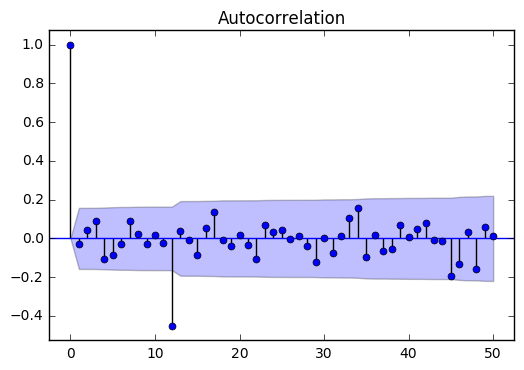

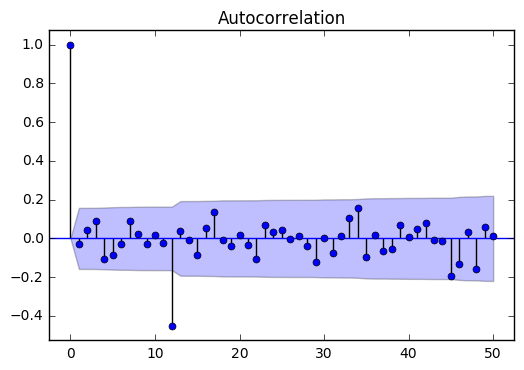

In [37]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(milk.daily_diff12[13:].values.squeeze(), lags=50)

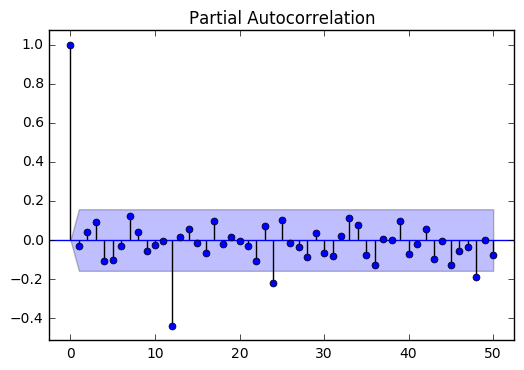

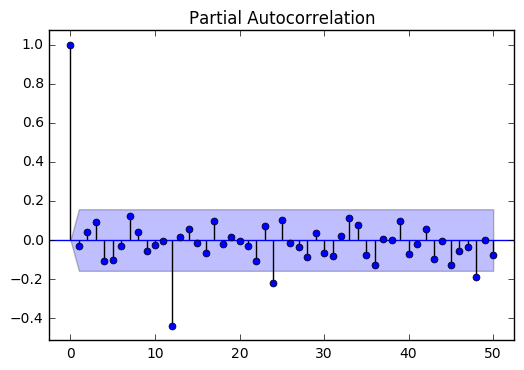

In [38]:
sm.graphics.tsa.plot_pacf(milk.daily_diff12[13:].values.squeeze(), lags=50)